## 基本資訊

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('../pubg-finish-placement-prediction/train_V2.csv')
test = pd.read_csv('../pubg-finish-placement-prediction/test_V2.csv')
print('Train data: \nRows: {}\nCols: {}'.format(train.shape[0],train.shape[1]))
print(train.columns)
print('\nTest data: \nRows: {}\nCols: {}'.format(test.shape[0],test.shape[1]))
print(test.columns)

Train data: 
Rows: 4446966
Cols: 29
Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

Test data: 
Rows: 1934174
Cols: 28
Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints'],
      dtype='object')


In [43]:
for c in ['Id','groupId','matchId']:
    print(f'unique [{c}] count:', train[c].nunique())

unique [Id] count: 4446966
unique [groupId] count: 2026745
unique [matchId] count: 47965


## 各變數敘述性統計資訊

In [44]:
import numpy as np
import seaborn as sns
train.describe(include=np.number).drop('count').T

,mean,std,min,25%,50%,75%,max
assists,0.233815,0.588573,0.0,0.0,0.0000,0.000000,22.0
boosts,1.106908,1.715794,0.0,0.0,0.0000,2.000000,33.0
damageDealt,130.717138,170.780621,0.0,0.0,84.2400,186.000000,6616.0
DBNOs,0.657876,1.145743,0.0,0.0,0.0000,1.000000,53.0
headshotKills,0.226820,0.602155,0.0,0.0,0.0000,0.000000,64.0
heals,1.370147,2.679982,0.0,0.0,0.0000,2.000000,80.0
killPlace,47.599350,27.462937,1.0,24.0,47.0000,71.000000,101.0
killPoints,505.006042,627.504896,0.0,0.0,0.0000,1172.000000,2170.0
kills,0.924783,1.558445,0.0,0.0,0.0000,1.000000,72.0
killStreaks,0.543955,0.710972,0.0,0.0,0.0000,1.000000,20.0


# 遺失值 (target)

In [45]:
print("Missing values in Train data")
for x in train.columns:
    if train[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x,train[x].isnull().values.ravel().sum()))

print("Missing values in Test data")
for x in test.columns:
    if test[x].isnull().values.ravel().sum() > 0:
        print('{} - {}'.format(x,test[x].isnull().values.ravel().sum()))
        
train.dropna(inplace=True)

Missing values in Train data
winPlacePerc - 1
Missing values in Test data


In [46]:
#numGroups与maxPlace匹配程度
for q in ['numGroups == maxPlace','numGroups != maxPlace']:
    print(q, ':', len(train.query(q)))
# 不匹配的原因可能是機器人的存在

numGroups == maxPlace : 1241089
numGroups != maxPlace : 3205876


## Correlation Matrix

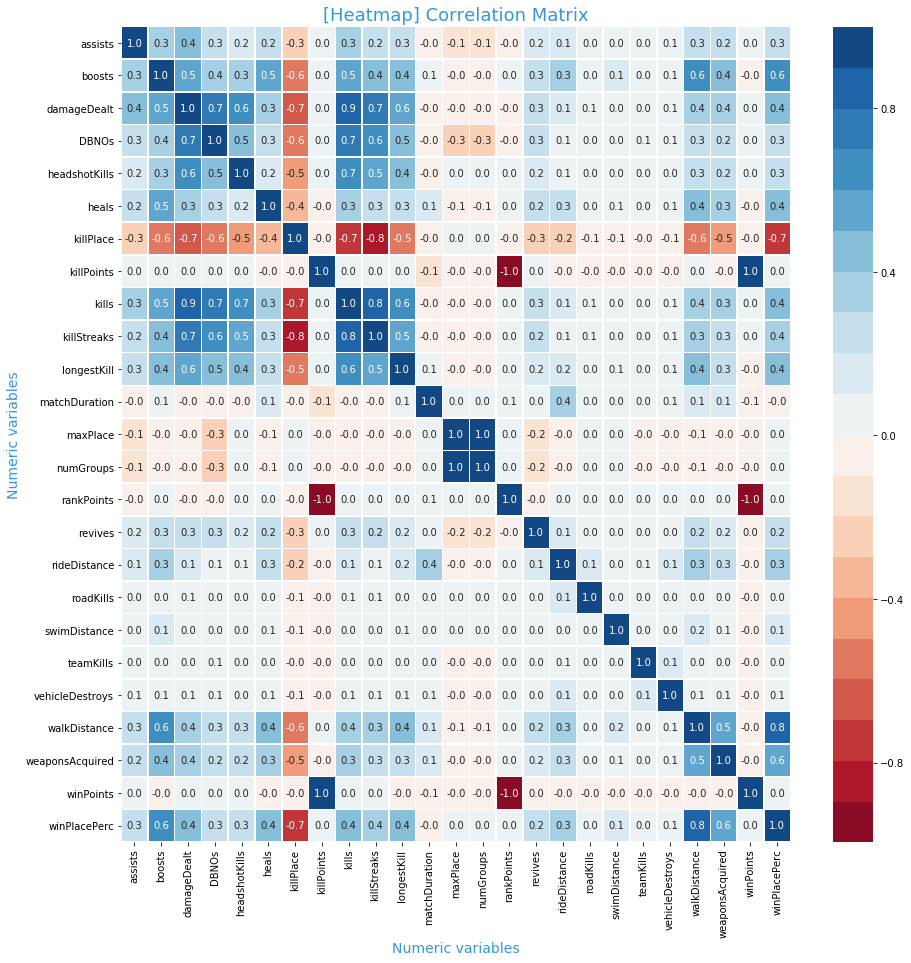

In [47]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(train.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap=sns.color_palette("RdBu", 20))

ax.set_xlabel('Numeric variables', size=14, color="#3498DB")
ax.set_ylabel('Numeric variables', size=14, color="#3498DB")
ax.set_title('[Heatmap] Correlation Matrix', size=18, color="#3498DB")

plt.show()

# 高相關變數1 - Boosts

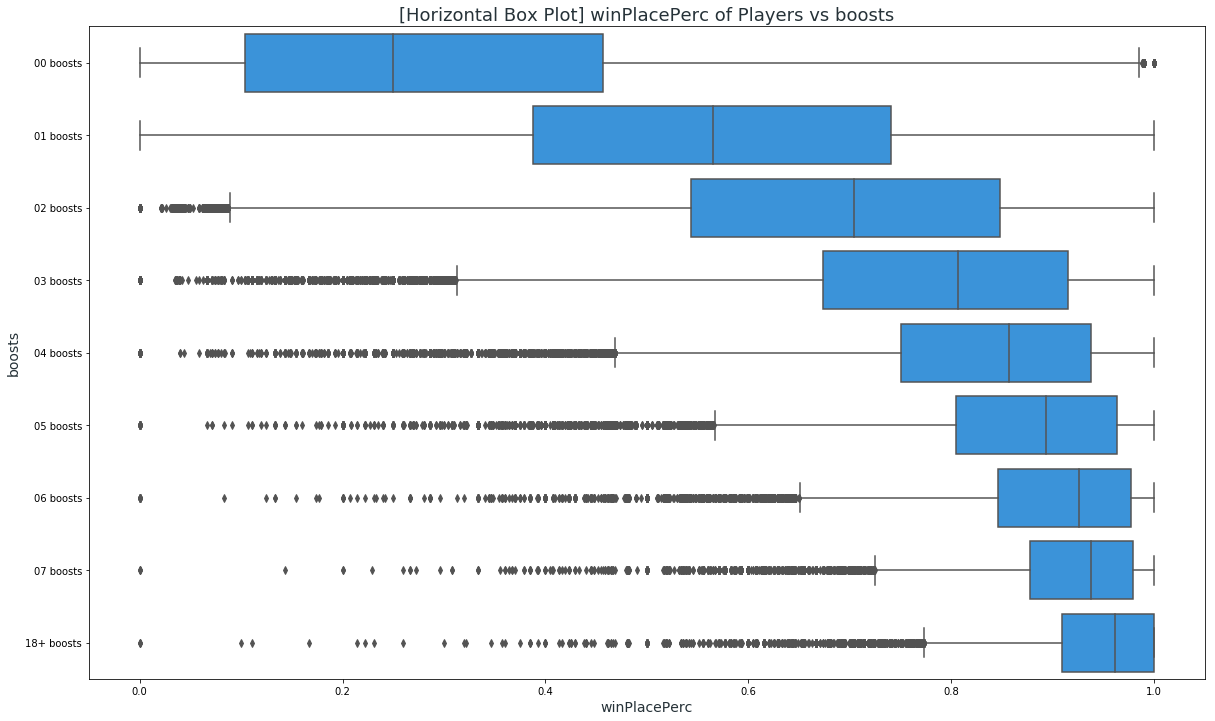

In [48]:
data = train[['boosts','winPlacePerc']].copy()
data.loc[data['boosts'] > data['boosts'].quantile(0.99), 'boosts'] = '18+'
data['boosts'] = data.boosts.apply(lambda x: '0' + str(x) if isinstance(x,int) and x<10 else x) 
data['boosts'] = data['boosts'].map(str) + " boosts"
x_order = data.groupby('boosts').mean().reset_index()['boosts']

fig, ax = plt.subplots(figsize=(20,12))
a = sns.boxplot(x='winPlacePerc', y='boosts', data=data, ax=ax, color="#2196F3", order=x_order)
ax.set_ylabel('boosts', size=14, color="#263238")
ax.set_xlabel('winPlacePerc', size=14, color="#263238")
ax.set_title('[Horizontal Box Plot] winPlacePerc of Players vs boosts', size=18, color="#263238")
plt.show()
# 獲得補給品越多，獲勝機率越多

# 高相關變數2 - KillPlace

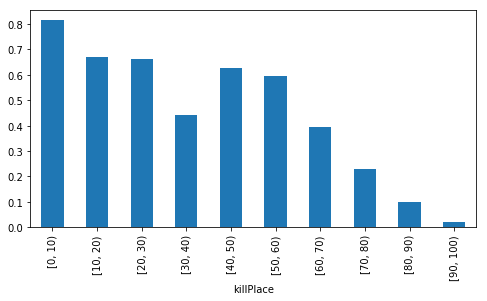

In [49]:
plt.figure(figsize=(8,4))
col = 'killPlace'
sub = train[['winPlacePerc',col]].copy()
sub[col] = pd.cut(sub[col], [10*x for x in range(0,11)], right=False)
sub.groupby(col).mean()['winPlacePerc'].plot.bar()
# killplace 是每場比賽中的擊殺排名，擊殺數越多排名越好(數字越小)因此跟target有負向關係

In [50]:
''' important : killPlace is a sorted ranking of kills and winPlacePerc in each match 
'''
subMatch = train[train['matchId'] == train['matchId'].min()].sort_values(['winPlacePerc','killPlace'])
cols = ['groupId','kills','winPlacePerc','killPlace']
subMatch[cols]

,groupId,kills,winPlacePerc,killPlace
3895898,3a6addfa0df938,0,0.000,94
3599150,3a6addfa0df938,0,0.000,95
4367296,236ab9e9c081b9,0,0.037,88
4131025,236ab9e9c081b9,0,0.037,89
3088817,236ab9e9c081b9,0,0.037,90
...,...,...,...,...
1303528,ca058240046b4c,6,0.963,3
3637258,ca058240046b4c,5,0.963,6
2351120,ca058240046b4c,1,0.963,24
2848198,4d1bbbc19b9084,5,1.000,5


In [51]:
import plotly.graph_objs as go
from plotly.offline import plot
data = train[['kills']].copy()

data.loc[data['kills'] > data['kills'].quantile(0.99)] = 8
temp1 = data['kills'].value_counts(sort=False).reset_index()
temp2 = data['kills'].value_counts(sort=False, normalize=True).reset_index()
temp2['kills'] = temp2['kills'] * 100

temp = pd.merge(temp1,temp2,how='inner',on='index')
temp['cum'] = temp['kills_y'].cumsum()
temp.loc[temp['index']==8, 'index'] = '8+'
temp['index'] = temp['index'].map(str) + " kills"

trace1 = dict(type='bar',
    x=temp['index'],
    y=temp['kills_x'],
    marker=dict(
        color='#2196F3'
    ),
    name='Number of kills',
    opacity=0.8
)

trace2 = dict(type='scatter',
    x=temp['index'],
    y=temp['cum'],
    marker=dict(
        color='#263238'
    ),
    line=dict(
        color= '#263238', 
        width= 1.5),
    name='Cumulative % of Players',
    xaxis='x1', 
    yaxis='y2' 
)

data = [trace1, trace2]

layout = go.Layout(
    title='[Pareto Analysis] Kills vs % of Players',
    legend= dict(orientation="h"),
    yaxis=dict(
        range=[0,2625000],
        title='Number of Kills',
        titlefont=dict(
            color="#2196F3"
        )
    ),
    yaxis2=dict(
        title='Cumulative % of Players',
        titlefont=dict(
            color='#263238'
        ),
        range=[0,105],
        overlaying='y',
        anchor='x',
        side='right'
        )
    )

from plotly.offline import plot
fig = go.Figure(data=data, layout=layout)
plot(fig, filename="pareto")

C:\ProgramData\Anaconda3\lib\site-packages\plotly\offline\offline.py:562: UserWarning:

Your filename `pareto` didn't end with .html. Adding .html to the end of your file.



'pareto.html'

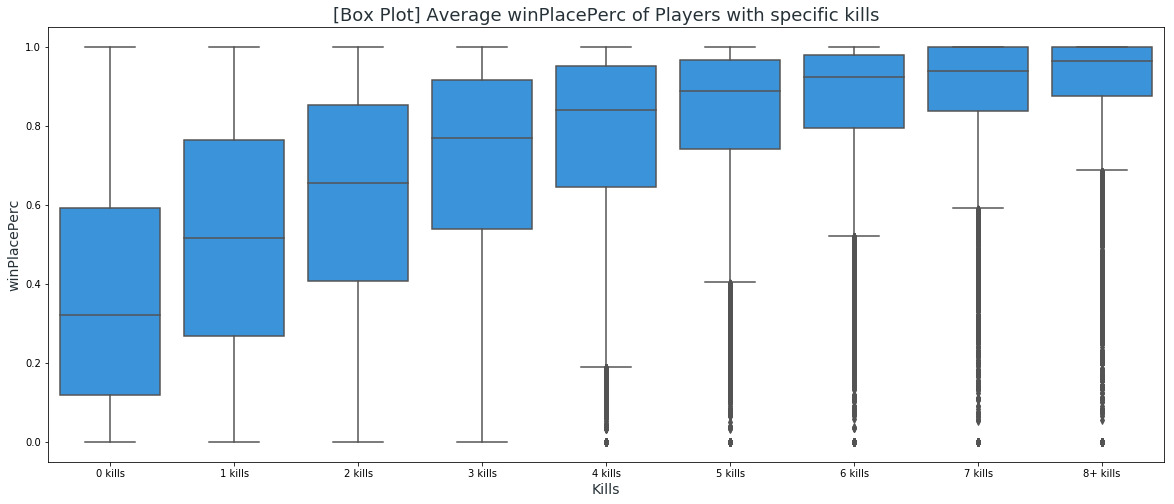

In [52]:
data = train[['kills','winPlacePerc']].copy()
data.loc[data['kills'] > data['kills'].quantile(0.99), 'kills'] = '8+'
data['kills'] = data['kills'].map(str) + " kills"
x_order = data.groupby('kills').mean().reset_index()['kills']

fig, ax = plt.subplots(figsize=(20,8))
a = sns.boxplot(x='kills', y='winPlacePerc', data=data, ax=ax, color="#2196F3", order=x_order)
ax.set_xlabel('Kills', size=14, color="#263238")
ax.set_ylabel('winPlacePerc', size=14, color="#263238")
ax.set_title('[Box Plot] Average winPlacePerc of Players with specific kills', size=18, color="#263238")
plt.show()

# 高相關變數3 - Walk Distance

99th percentile of walk distance is 4396.0m


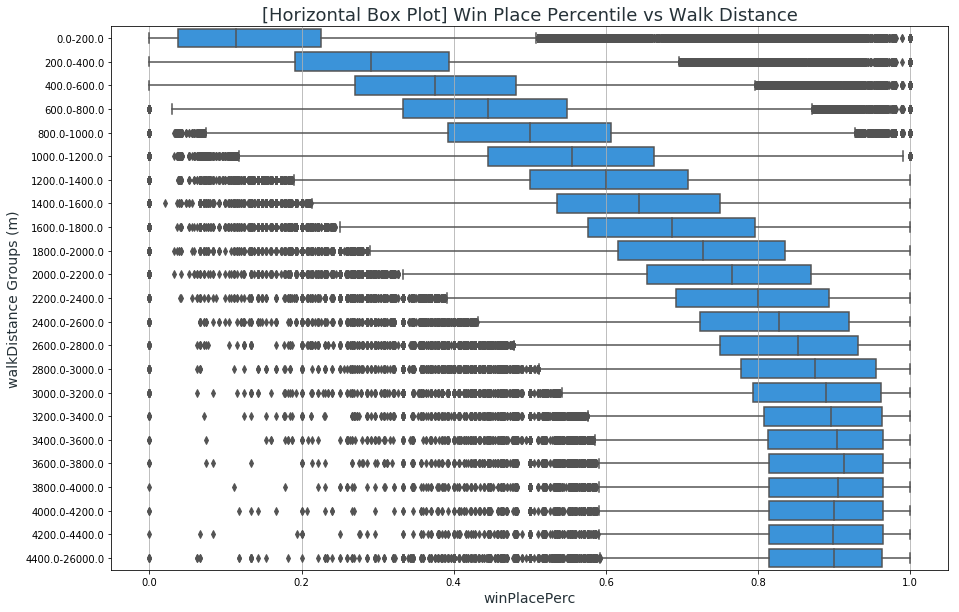

In [53]:
kills = train[['walkDistance','winPlacePerc']].copy()

print("99th percentile of walk distance is {}m".format(kills['walkDistance'].quantile(0.99)))

cut_range = np.linspace(0,4400,23)
cut_range = np.append(cut_range, 26000)
kills['walkDistanceGrouping'] = pd.cut(kills['walkDistance'],
                                 cut_range,
                                 labels=["{}-{}".format(a_, b_) for a_, b_ in zip(cut_range[:23], cut_range[1:])],
                                 include_lowest=True
                                )

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(x="winPlacePerc", y="walkDistanceGrouping", data=kills, ax=ax, color="#2196F3")
ax.set_xlabel('winPlacePerc', size=14, color="#263238")
ax.set_ylabel('walkDistance Groups (m)', size=14, color="#263238")
ax.set_title('[Horizontal Box Plot] Win Place Percentile vs Walk Distance', size=18, color="#263238")
plt.gca().xaxis.grid(True)
plt.show()

# 行走距離越長，獲勝機率越高，兩者之間有正相關，但走超過3200m後，獲勝機率不提升

# 高相關變數3 - Weapons Acquired

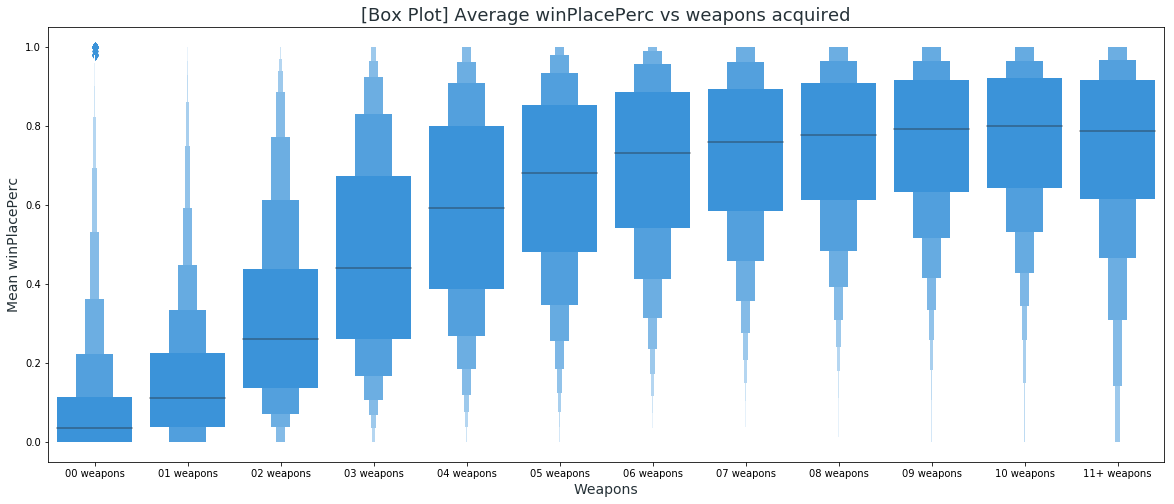

In [54]:
weapons = train[['weaponsAcquired','winPlacePerc']].copy()
weapons.loc[weapons['weaponsAcquired'] > weapons['weaponsAcquired'].quantile(0.99), 'weaponsAcquired'] = '11+'
weapons['weaponsAcquired'] = weapons.weaponsAcquired.apply(lambda x: '0' + str(x) if isinstance(x,int) and x<10 else x) 
weapons['weaponsAcquired'] = weapons['weaponsAcquired'].map(str) + " weapons"
x_order = weapons.groupby('weaponsAcquired').mean().reset_index()['weaponsAcquired']

fig, ax = plt.subplots(figsize=(20,8))
a = sns.boxenplot(x='weaponsAcquired', y='winPlacePerc', data=weapons, ax=ax, color="#2196F3", order=x_order)
ax.set_xlabel('Weapons', size=14, color="#263238")
ax.set_ylabel('Mean winPlacePerc', size=14, color="#263238")
ax.set_title('[Box Plot] Average winPlacePerc vs weapons acquired', size=18, color="#263238")
plt.show()
# 獲得武器越多，獲勝機率越多，但拿到超過7項武器後，勝率不提升

## MatchType 
### 遊戲中有不同比賽類型，不同類型類型是否呈現不同趨勢?

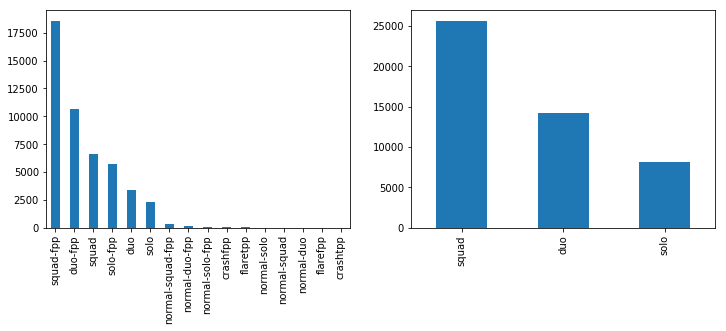

In [8]:
# 檢查原先matchType欄位的玩家人數跟遊戲類型不匹配，跟自己做的標籤有落差，下面以自己做標籤為主
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[0])

'''
solo  <-- solo,solo-fpp,normal-solo,normal-solo-fpp
duo   <-- duo,duo-fpp,normal-duo,normal-duo-fpp,crashfpp,crashtpp
squad <-- squad,squad-fpp,normal-squad,normal-squad-fpp,flarefpp,flaretpp
'''
mapper = lambda x: 'solo' if ('solo' in x) else 'duo' if ('duo' in x) or ('crash' in x) else 'squad'
train['matchType'] = train['matchType'].apply(mapper)
train.groupby('matchId')['matchType'].first().value_counts().plot.bar(ax=ax[1])

In [38]:
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games."
      .format(len(solos), 100*len(solos)/len(train), len(duos)
              , 100*len(duos)/len(train), len(squads), 100*len(squads)/len(train),))

mapper = lambda x: 'solos' if (x > 50) else 'duos' if (x>25 & x <=50) else 'squads'
train['matchType_adj'] = train['numGroups'].apply(mapper)

There are 709111 (15.95%) solo games, 3295326 (74.10%) duo games and 442529 (9.95%) squad games.


In [40]:
import itertools
def toTapleList(list1,list2):
    return list(itertools.product(list1,list2))
# describe
cols = ['numGroups','maxPlace']
desc1 = train.groupby('matchType_adj')[cols].describe()[toTapleList(cols,['min','mean','max'])]
# groups in match
group = train.groupby(['matchType_adj','matchId','groupId']).count().groupby(['matchType_adj','matchId']).size().to_frame('groups in match')
desc2 = group.groupby('matchType_adj').describe()[toTapleList(['groups in match'],['min','mean','max'])]

pd.concat([desc1, desc2], axis=1)

numGroups                   maxPlace                    \
                    min       mean    max      min       mean    max   
matchType_adj                                                          
duos                2.0  34.612396   50.0      2.0  35.839722   97.0   
solos              51.0  92.442412  100.0     51.0  95.088872  100.0   
squads              1.0  24.320662   25.0      1.0  26.089226   32.0   

              groups in match                    
                          min       mean    max  
matchType_adj                                    
duos                      2.0  34.072893   50.0  
solos                    51.0  92.238089  100.0  
squads                    1.0  23.675542   25.0

In [41]:
# Match Summary
cols = ['kills','teamKills','DBNOs','revives','assists','boosts','heals','damageDealt',
    'walkDistance','rideDistance','swimDistance','weaponsAcquired']

aggs = ['count','min','mean','max']
# summary of solo-match
grp = train.loc[train['matchType_adj'].str.contains('solo')].groupby('matchId')
grpSolo = grp[cols].sum()
# summary of team-match
grp = train.loc[~train['matchType_adj'].str.contains('solo')].groupby('matchId')
grpTeam = grp[cols].sum()

pd.concat([grpSolo.describe().T[aggs], grpTeam.describe().T[aggs]], keys=['solo', 'team'], axis=1)

solo                                            team       \
                  count         min          mean          max    count  min   
kills            7472.0     45.0000     88.120985      99.0000  40493.0  0.0   
teamKills        7472.0      0.0000      1.093282       8.0000  40493.0  0.0   
DBNOs            7472.0      0.0000      0.014855      65.0000  40493.0  0.0   
revives          7472.0      0.0000      0.003480      18.0000  40493.0  0.0   
assists          7472.0      0.0000      5.483672      22.0000  40493.0  0.0   
boosts           7472.0     54.0000    101.490498     182.0000  40493.0  0.0   
heals            7472.0     25.0000     96.715739     276.0000  40493.0  0.0   
damageDealt      7472.0   5879.2300  11154.364198   13465.4600  40493.0  0.0   
walkDistance     7472.0  40914.0960  91504.206348  156265.7110  40493.0  0.0   
rideDistance     7472.0      0.0064  44233.444147  207528.6269  40493.0  0.0   
swimDistance     7472.0      0.0000    487.262336    5222.3500  40493.0  0.0   
weaponsAcquired  7472.0    147.0000    336.412206     519.0000  40493.0  0.0   

                                            
                          mean         max  
kills                85.299681     786.000  
teamKills             2.419505      76.000  
DBNOs                72.245549     669.000  
revives              18.082311      81.000  
assists              24.665819     275.000  
boosts              102.833675     227.000  
heals               132.623861     424.000  
damageDealt       12297.168858   80991.200  
walkDistance     109872.030874  216150.870  
rideDistance      58401.784954  370542.200  
swimDistance        405.304113    9829.961  
weaponsAcquired     339.920283    1860.000

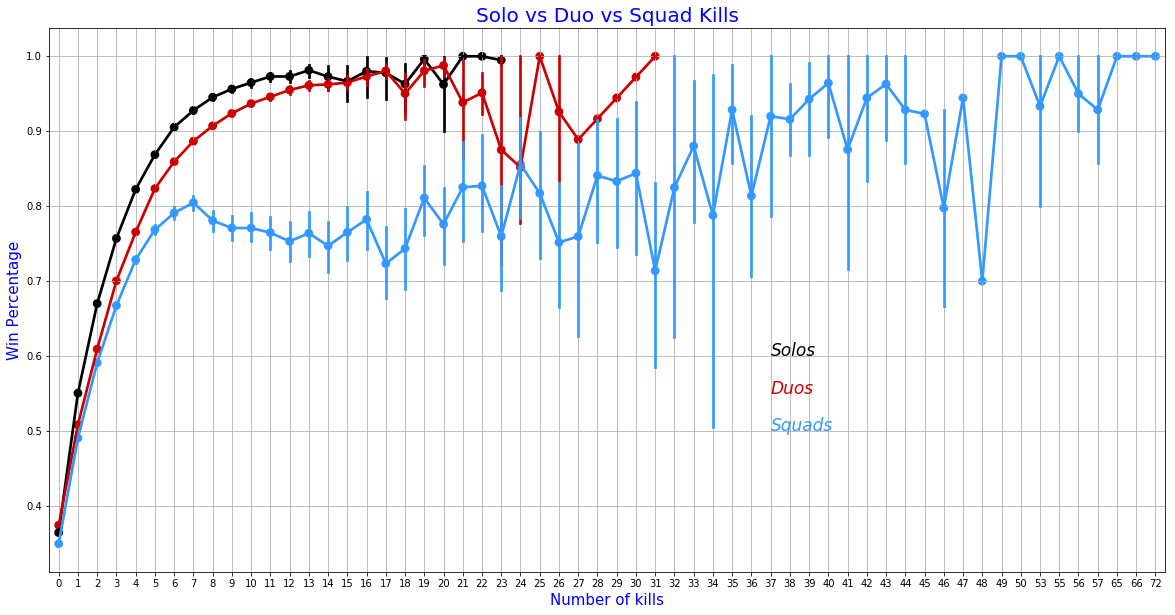

In [22]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17,style = 'italic')
plt.text(37,0.55,'Duos',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(37,0.5,'Squads',color='#3399FF',fontsize = 17,style = 'italic')
plt.xlabel('Number of kills',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20,color='blue')
plt.grid()
plt.show()

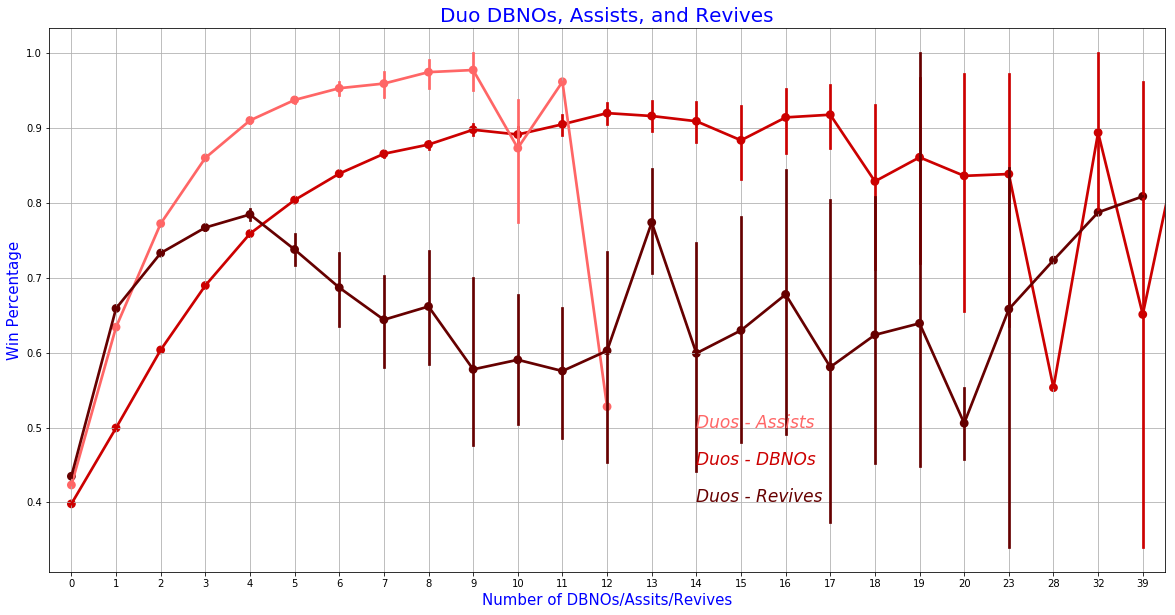

In [23]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='#FF6666',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='#660000',alpha=0.8)
plt.text(14,0.5,'Duos - Assists',color='#FF6666',fontsize = 17,style = 'italic')
plt.text(14,0.45,'Duos - DBNOs',color='#CC0000',fontsize = 17,style = 'italic')
plt.text(14,0.4,'Duos - Revives',color='#660000',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Duo DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
plt.show()

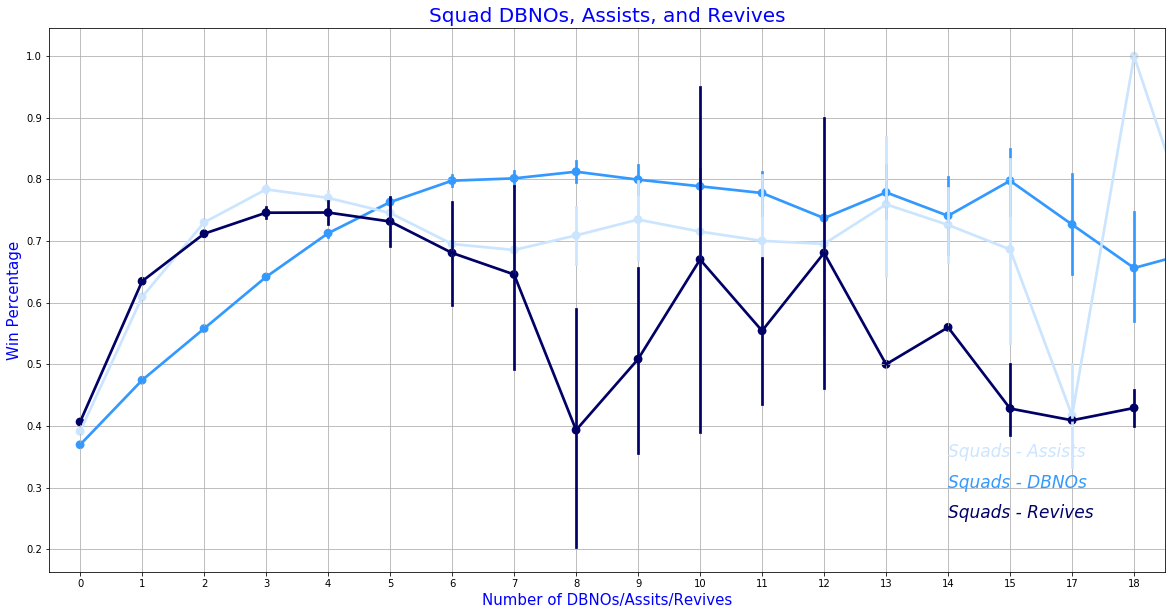

In [24]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='#CCE5FF',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='#000066',alpha=0.8)
plt.text(14,0.35,'Squads - Assists',color='#CCE5FF',fontsize = 17,style = 'italic')
plt.text(14,0.3,'Squads - DBNOs',color='#3399FF',fontsize = 17,style = 'italic')
plt.text(14,0.25,'Squads - Revives',color='#000066',fontsize = 17,style = 'italic')
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Squad DBNOs, Assists, and Revives',fontsize = 20,color='blue')
plt.grid()
plt.show()

## Others

In [29]:
# 假設移動距離、殺敵數、獲得武器皆為0的為殭屍
sub = train.query('walkDistance == 0 & kills == 0 & weaponsAcquired == 0 & \'solo\' in matchType')
print('殭屍玩家占比(%)','count:', len(sub), ' winPlacePerc:', round(sub['winPlacePerc'].mean(),3))
# 過強玩家，懷疑有用外掛
sq = 'kills > 3 & (headshotKills / kills) >= 0.8'
sub = train.query(sq)
print('外掛玩家占比(%)', 'count:', len(sub), ' winPlacePerc:', round(sub['winPlacePerc'].mean(),3))

print('Killer info')
print("The average person kills {:.4f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}."
      .format(train['kills'].mean(),train['kills'].quantile(0.99), train['kills'].max()))
print('Healer info')
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}."
      .format(train['heals'].mean(), train['heals'].quantile(0.99), train['heals'].max()))
print('Booster info')
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}."
      .format(train['boosts'].mean(), train['boosts'].quantile(0.99), train['boosts'].max()))
print('Runners info')
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m."
      .format(train['walkDistance'].mean(), train['walkDistance'].quantile(0.99), train['walkDistance'].max()))
print('Drivers info')
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m."
      .format(train['rideDistance'].mean(), train['rideDistance'].quantile(0.99), train['rideDistance'].max()))
print('Swimmers info')
print("The average person swims for {:.1f}m, 99% of people have swimemd {}m or less, while the olympic champion swimmed for {}m."
      .format(train['swimDistance'].mean(), train['swimDistance'].quantile(0.99), train['swimDistance'].max()))

殭屍玩家占比(%) count: 18155  winPlacePerc: 0.053
外掛玩家占比(%) count: 3859  winPlacePerc: 0.824
Killer info
The average person kills 0.9248 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.
Healer info
The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
Booster info
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.
Runners info
The average person walks for 1154.2m, 99% of people have walked 4396.0m or less, while the marathoner champion walked for 25780.0m.
Drivers info
The average person drives for 606.1m, 99% of people have drived 6966.0m or less, while the formula 1 champion drived for 40710.0m.
Swimmers info
The average person swims for 4.5m, 99% of people have swimemd 123.0m or less, while the olympic champion swimmed for 3823.0m.
